In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.misc import imsave,imresize,imread
import pandas as pd
from random import shuffle
import os
import glob

/home/ujjawal/project/env1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_fdr_path="/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/*"

In [3]:
len(glob.glob(data_fdr_path))

1000

In [4]:
dir_list=glob.glob(data_fdr_path)

In [5]:
global_img_path_list=[]
count=0
#hf = h5py.File('train_data.h5', 'w')
for dir_path in dir_list:
    count=count+1
    img_path_list=glob.glob(str(dir_path+"/*"))
    print(str(count),len(img_path_list))
    for img in img_path_list:
        global_img_path_list.append(img)

print(len(global_img_path_list))
    
    

1 1300
2 1300
3 1300
4 1300
5 1300
6 1300
7 1300
8 1300
9 1300
10 1300
11 1300
12 1062
13 1300
14 1300
15 1118
16 1300
17 1300
18 1300
19 889
20 1300
21 1300
22 1300
23 1300
24 1300
25 1300
26 1300
27 1300
28 1300
29 1300
30 1300
31 1300
32 1300
33 1300
34 1300
35 1300
36 1300
37 1300
38 1300
39 1300
40 1300
41 1300
42 1300
43 1300
44 1300
45 1300
46 1300
47 1300
48 1300
49 1300
50 1300
51 1300
52 1154
53 1300
54 1300
55 1300
56 1300
57 1300
58 1300
59 1125
60 1300
61 1300
62 1300
63 1300
64 1300
65 1300
66 1300
67 1300
68 1300
69 1300
70 1300
71 1300
72 1300
73 1300
74 1300
75 1300
76 1300
77 1300
78 1300
79 1300
80 1300
81 1300
82 1300
83 1300
84 1300
85 1300
86 1004
87 1300
88 1300
89 1300
90 1300
91 1300
92 1300
93 1300
94 1300
95 1300
96 1300
97 1300
98 1300
99 1300
100 1300
101 1300
102 1300
103 931
104 1300
105 1300
106 1300
107 1300
108 1300
109 1300
110 1300
111 1300
112 1300
113 1300
114 1300
115 1300
116 1300
117 1300
118 1300
119 1300
120 1300
121 1300
122 1300
123 1300
124

942 1264
943 1300
944 1300
945 1300
946 1300
947 1300
948 1300
949 1300
950 1300
951 1300
952 1300
953 1300
954 1300
955 1300
956 1300
957 1300
958 1300
959 1300
960 1300
961 1300
962 1300
963 1300
964 1300
965 1300
966 1300
967 1300
968 1300
969 1300
970 1300
971 1300
972 1300
973 1300
974 1300
975 1300
976 1300
977 1300
978 1300
979 1149
980 1300
981 1300
982 1300
983 1300
984 1300
985 1270
986 1300
987 1300
988 1300
989 1300
990 1300
991 1266
992 1300
993 1300
994 1300
995 1300
996 1300
997 1300
998 1300
999 1300
1000 1300
1281167


In [6]:
label_list=[]
count=0
for img_dir in dir_list:
    count=count+1
    list_img=glob.glob(str(img_dir+"/*"))
    for img in range(len(list_img)):
        label_list.append(count-1)
    
len(label_list)

1281167

In [7]:
label_list[0]

0

In [26]:
shuffle_data = True
# to shuffle data
if shuffle_data:
    c = list(zip(global_img_path_list, label_list))
    shuffle(c)
    global_img_path_list, label_list = zip(*c)

In [27]:
for label in label_list:
    print(label)
    break

213


In [53]:
len(set(label_list))

1000

In [29]:
label_list[0],global_img_path_list[0]

(213,
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n01768244/n01768244_5648.JPEG')

In [30]:
hf = h5py.File('train_data.h5', 'w')
hf.create_dataset("train_data", shape=(1281167,224,224,3), compression="gzip", compression_opts=9)
hf.close()

In [31]:
import numpy as np
import h5py

class HDF5Store(object):
    """
    Simple class to append value to a hdf5 file on disc (usefull for building keras datasets)
    
    Params:
        datapath: filepath of h5 file
        dataset: dataset name within the file
        shape: dataset shape (not counting main/batch axis)
        dtype: numpy dtype
    
    Usage:
        hdf5_store = HDF5Store('/tmp/hdf5_store.h5','X', shape=(20,20,3))
        x = np.random.random(hdf5_store.shape)
        hdf5_store.append(x)
        hdf5_store.append(x)
        
    From https://gist.github.com/wassname/a0a75f133831eed1113d052c67cf8633
    """
    def __init__(self, datapath, dataset, shape, dtype=np.float32, compression="gzip", chunk_len=1):
        self.datapath = datapath
        self.dataset = dataset
        self.shape = shape
        self.i = 0
        
        with h5py.File(self.datapath, mode='w') as h5f:
            self.dset = h5f.create_dataset(
                dataset,
                shape=(0, ) + shape,
                maxshape=(None, ) + shape,
                dtype=dtype,
                compression=compression,
                chunks=(chunk_len, ) + shape)
    
    def append(self, values):
        with h5py.File(self.datapath, mode='a') as h5f:
            dset = h5f[self.dataset]
            dset.resize((self.i + 1, ) + shape)
            dset[self.i] = [values]
            self.i += 1
            h5f.flush()
 


In [32]:
# test
shape = (224,224,3)
hdf5_store = HDF5Store('/home/ujjawal/project/env1/train_data.h5','train_data', shape=shape)
   
for each_img in global_img_path_list:
    img=imread(each_img)
    if len(img.shape)==2:
        new_img=np.zeros((img.shape[0],img.shape[1],3))
        for ch in range(3):
            for height in range(img.shape[0]):
                for width in range(img.shape[1]):
                    new_img[height,width,ch]=img[height,width]
        img=new_img
    if img.shape[2]==4:
        image_without_alpha = img[:,:,:3]
        img=image_without_alpha 
    img=imresize(img,(224,224))
    hdf5_store.append(img)
    

/home/ujjawal/project/env1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/ujjawal/project/env1/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/ujjawal/project/env1/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/ujjawal/project/env1/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/ujjawal/project/env1/lib/python3.6/site-packages/PIL/Tif

In [43]:
hf=h5py.File("/home/ujjawal/project/env1/train_data.h5",'r')

In [44]:
list(hf.keys())

['train_data']

In [45]:
hf['train_data'].shape

(1281167, 224, 224, 3)

In [46]:
hf['train_data'].dtype

dtype('float32')

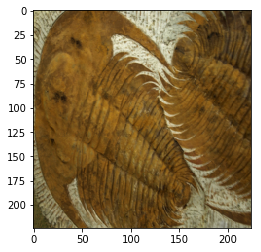

In [49]:
plt.imshow(np.uint8(hf['train_data'][0]))

In [50]:
pl=imread('/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n01768244/n01768244_5648.JPEG')

/home/ujjawal/project/env1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


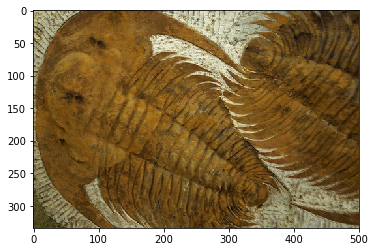

In [51]:
plt.imshow(pl)

In [54]:
hf.close()

In [60]:
hf2=h5py.File('train_labels.h5','r')

In [63]:
list(hf2.keys())

['train_labels']

In [64]:
hf2['train_labels'][0]

213.0

In [62]:
len(set(list(hf2['train_labels'])))

1000

In [65]:
hf2.close()

In [39]:
hf1 = h5py.File('train_labels.h5', 'w')
hf1.create_dataset("train_labels", shape=(1281167,), compression="gzip", compression_opts=9)
hf1.close()

In [40]:
shape = ()
hdf5_store = HDF5Store('/home/ujjawal/project/env1/train_labels.h5','train_labels', shape=shape)
for label in label_list:
    hdf5_store.append(label)

In [67]:
from xml.dom import minidom

In [68]:
doc = minidom.parse("/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Annotations/CLS-LOC/val/ILSVRC2012_val_00000001.xml")


In [69]:
name = doc.getElementsByTagName("name")[0]
print(name.firstChild.data)

n01751748


In [70]:
val_path=glob.glob('/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Annotations/CLS-LOC/val/*')

In [71]:
file = open("val_labels.txt","w") 
list_name=[]
for path in val_path:
    doc=minidom.parse(path)
    name = doc.getElementsByTagName("name")[0]
    class_name=name.firstChild.data
    file.write(str(class_name)+"\n") 
    list_name.append(class_name)

print(len(list_name))
file.close()    

50000


In [72]:
type(list_name[0])

str

In [73]:
class_folder=glob.glob("/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/*")

In [74]:
class_folder

['/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n03930630',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n03124043',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n04149813',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n02169497',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n13052670',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n02835271',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n01694178',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n02172182',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train/n13054560',
 '/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/adity

In [75]:
list_class=os.listdir("/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/train")

In [76]:
list_class

['n03930630',
 'n03124043',
 'n04149813',
 'n02169497',
 'n13052670',
 'n02835271',
 'n01694178',
 'n02172182',
 'n13054560',
 'n04367480',
 'n01914609',
 'n04525038',
 'n03447447',
 'n02071294',
 'n03947888',
 'n01824575',
 'n03720891',
 'n04462240',
 'n03197337',
 'n02085936',
 'n04366367',
 'n01806567',
 'n02808304',
 'n01955084',
 'n03452741',
 'n02125311',
 'n03724870',
 'n03627232',
 'n01806143',
 'n02749479',
 'n03954731',
 'n02094433',
 'n01748264',
 'n03666591',
 'n02112018',
 'n02490219',
 'n07930864',
 'n02174001',
 'n01882714',
 'n01491361',
 'n02791270',
 'n02788148',
 'n04336792',
 'n03240683',
 'n02823750',
 'n02786058',
 'n04579432',
 'n02100583',
 'n07717410',
 'n02397096',
 'n03000247',
 'n03062245',
 'n02114548',
 'n09421951',
 'n12057211',
 'n07714571',
 'n01697457',
 'n03633091',
 'n07730033',
 'n02655020',
 'n01978455',
 'n03854065',
 'n01514668',
 'n03982430',
 'n12267677',
 'n13044778',
 'n04347754',
 'n02361337',
 'n03207941',
 'n07583066',
 'n01983481',
 'n076

In [77]:
file = open("class_names.txt","w")
for name in list_class:
    file.write(str(name)+"\n")
file.close()
    

In [78]:
dict_class={}
count=0
for class_name in list_class:
    dict_class[class_name]=count;
    count=count+1
    

In [79]:
dict_class

{'n03930630': 0,
 'n03124043': 1,
 'n04149813': 2,
 'n02169497': 3,
 'n13052670': 4,
 'n02835271': 5,
 'n01694178': 6,
 'n02172182': 7,
 'n13054560': 8,
 'n04367480': 9,
 'n01914609': 10,
 'n04525038': 11,
 'n03447447': 12,
 'n02071294': 13,
 'n03947888': 14,
 'n01824575': 15,
 'n03720891': 16,
 'n04462240': 17,
 'n03197337': 18,
 'n02085936': 19,
 'n04366367': 20,
 'n01806567': 21,
 'n02808304': 22,
 'n01955084': 23,
 'n03452741': 24,
 'n02125311': 25,
 'n03724870': 26,
 'n03627232': 27,
 'n01806143': 28,
 'n02749479': 29,
 'n03954731': 30,
 'n02094433': 31,
 'n01748264': 32,
 'n03666591': 33,
 'n02112018': 34,
 'n02490219': 35,
 'n07930864': 36,
 'n02174001': 37,
 'n01882714': 38,
 'n01491361': 39,
 'n02791270': 40,
 'n02788148': 41,
 'n04336792': 42,
 'n03240683': 43,
 'n02823750': 44,
 'n02786058': 45,
 'n04579432': 46,
 'n02100583': 47,
 'n07717410': 48,
 'n02397096': 49,
 'n03000247': 50,
 'n03062245': 51,
 'n02114548': 52,
 'n09421951': 53,
 'n12057211': 54,
 'n07714571': 55,
 '

In [80]:
len(list_name)

50000

In [81]:
val_label=[]
for name in list_name:
    for key in dict_class:
        if name==key:
            name=int(dict_class[key])
            print(name)
            val_label.append(name)
            

634
945
416
820
956
937
89
762
698
357
998
318
516
567
958
83
89
448
512
107
884
191
641
365
198
594
267
63
160
265
552
670
967
580
949
653
239
248
380
178
636
171
949
797
604
61
873
29
337
218
57
181
676
892
400
104
127
911
643
469
763
129
212
19
628
153
266
344
491
306
855
308
684
605
965
527
463
324
826
753
258
104
561
108
464
479
891
671
636
60
848
758
792
54
182
643
256
308
127
384
465
107
732
128
314
532
27
461
571
567
498
385
282
98
816
865
475
211
142
852
630
155
546
947
516
946
595
500
253
602
501
956
60
543
507
6
917
227
731
840
753
691
739
630
769
632
206
101
290
309
854
694
706
733
555
522
655
521
367
574
191
450
913
694
543
149
414
322
84
566
669
678
249
910
371
320
482
96
963
79
737
676
561
356
771
10
994
742
922
197
629
56
551
518
412
74
974
578
346
817
527
984
486
560
818
870
948
700
805
436
403
184
82
108
960
850
388
420
333
651
782
876
205
210
464
50
587
261
465
86
757
453
97
114
439
588
328
169
177
254
748
365
238
700
751
766
802
160
317
880
773
984
671
689
210
984
8

473
183
442
934
539
804
24
500
167
795
321
411
330
76
124
730
753
34
344
739
774
155
58
378
771
605
189
247
807
419
759
689
503
59
362
628
435
486
1
463
948
291
557
11
9
712
487
102
414
669
768
994
81
40
747
836
770
993
513
529
826
119
108
679
465
205
529
149
111
431
873
585
524
863
453
207
631
282
945
687
619
604
933
379
257
154
749
166
817
477
798
480
645
8
822
263
978
485
76
353
278
188
482
224
369
881
133
416
204
932
783
296
459
962
502
177
864
164
716
358
422
404
681
237
439
636
343
420
104
689
583
487
971
806
132
284
314
764
36
648
2
458
732
900
355
934
555
771
467
451
240
743
494
454
728
422
221
936
651
275
892
886
766
813
115
67
25
38
383
975
959
811
859
690
25
258
30
230
628
625
679
102
661
734
890
425
886
832
241
415
742
309
185
730
827
767
693
950
192
719
731
621
520
755
401
21
742
582
696
639
296
45
293
212
813
871
766
194
321
584
350
799
999
955
325
735
820
589
322
512
609
438
995
650
412
670
197
283
96
291
442
229
935
516
109
24
407
638
259
713
216
99
828
43
516
187
924
8

96
222
613
0
548
996
877
631
862
744
511
601
345
156
0
638
838
485
667
912
51
132
146
154
735
781
294
154
333
266
543
311
493
662
424
743
584
25
654
943
896
410
143
739
755
396
225
463
342
843
68
620
75
977
303
93
541
258
383
894
421
824
530
180
606
321
554
154
139
511
145
956
946
822
180
327
204
353
81
732
227
262
280
712
870
469
346
896
141
761
783
833
513
219
349
563
754
820
634
107
206
793
232
880
225
507
386
195
990
940
256
360
88
18
661
914
134
228
637
39
939
281
854
623
304
792
687
982
460
768
151
844
749
374
492
530
41
466
883
105
815
745
818
954
624
401
360
844
481
715
730
668
407
89
161
64
127
116
136
771
622
115
956
329
171
993
493
623
307
167
48
152
10
454
319
444
584
751
51
36
893
361
370
266
554
854
972
929
220
53
341
874
799
689
756
423
606
903
294
423
733
850
985
73
251
243
858
118
616
237
847
708
899
826
363
886
994
922
995
374
120
638
384
75
677
588
595
840
548
777
677
119
482
165
861
170
590
494
722
241
791
598
445
949
932
46
955
777
463
381
857
971
390
793
517
896
3

298
395
606
544
59
348
397
800
182
543
736
546
41
198
828
984
199
236
617
120
484
43
74
874
459
639
569
506
655
329
802
756
799
970
797
697
795
168
802
516
222
975
268
411
454
699
32
738
874
238
107
399
361
396
934
345
312
528
254
544
235
554
463
145
984
460
499
581
431
845
973
691
11
341
230
268
324
413
9
750
213
813
865
16
993
142
576
377
322
89
422
819
673
277
241
840
538
390
474
676
578
311
891
764
665
773
434
421
501
843
714
404
740
308
564
692
965
792
340
338
689
948
957
769
323
180
81
886
729
520
317
158
554
662
637
971
526
720
26
4
700
795
394
4
606
47
221
685
977
263
799
965
355
724
517
239
846
276
701
308
95
462
526
961
523
674
279
185
178
428
171
618
999
471
448
479
995
485
111
993
958
224
655
35
68
105
932
437
892
360
837
688
966
892
148
787
336
299
50
369
792
831
628
474
321
735
895
987
121
97
147
662
264
955
331
769
866
954
309
948
805
904
742
239
413
640
787
848
470
59
729
804
401
926
773
939
179
934
848
5
669
163
828
87
720
399
62
75
301
127
153
261
357
834
384
342
412


245
374
659
345
724
159
619
181
406
572
661
772
100
41
761
96
303
693
612
399
70
697
354
762
510
22
609
811
938
371
741
913
980
607
699
315
78
713
542
740
869
308
527
981
510
376
349
816
185
663
530
33
421
878
200
461
855
980
927
378
333
516
426
461
603
858
648
948
300
390
712
916
177
237
386
466
100
7
69
821
277
898
626
481
434
272
973
898
514
534
783
691
123
999
497
671
940
757
541
995
698
511
435
417
671
461
893
957
11
174
338
420
849
262
30
962
980
837
941
787
115
962
789
511
96
403
337
864
747
241
728
993
301
141
558
792
532
230
490
645
427
436
27
970
761
470
668
407
830
962
531
129
777
187
129
810
518
948
288
427
316
461
180
893
814
623
433
950
683
304
612
467
981
789
490
275
138
231
408
596
525
181
365
169
932
633
838
45
932
298
131
893
610
814
314
80
34
502
779
828
840
3
594
539
577
190
468
610
715
583
571
963
77
625
992
873
149
694
764
677
993
492
429
353
130
226
431
123
872
368
612
141
747
933
869
820
954
790
716
152
450
826
39
181
120
685
722
613
619
966
448
918
161
43
177
7

811
90
107
76
101
204
246
176
937
885
36
877
218
951
444
86
626
288
67
757
563
437
417
561
460
889
29
300
32
264
572
229
504
477
517
869
134
142
399
181
166
404
669
764
448
355
45
500
775
529
672
825
330
732
779
584
957
12
500
495
123
647
242
310
523
420
991
60
685
69
69
634
181
782
969
757
423
137
305
992
412
309
260
344
198
512
97
585
262
830
252
991
247
85
653
805
524
8
72
883
982
362
191
551
923
923
916
47
398
31
23
263
648
442
81
619
998
165
861
866
732
75
263
393
827
758
881
520
701
641
75
916
64
427
835
92
57
781
861
949
487
767
697
8
817
184
808
66
281
599
600
513
799
28
112
83
212
598
531
574
634
877
337
531
965
310
112
408
577
510
577
519
236
233
965
604
318
628
494
545
23
335
972
365
13
949
737
429
121
649
765
504
332
64
660
263
263
491
643
226
752
958
234
389
37
619
462
891
376
740
906
355
571
337
839
867
400
409
518
154
157
354
638
681
473
980
847
427
210
106
48
598
491
322
363
5
390
867
352
289
987
213
504
4
127
471
494
209
911
387
658
450
931
801
47
648
550
190
58
675
45

539
553
584
484
866
636
130
310
434
835
601
628
25
251
670
355
43
231
487
411
323
175
704
664
640
315
973
451
454
577
672
950
444
277
648
80
573
701
47
624
195
9
967
210
16
924
30
326
245
65
620
453
984
503
772
870
837
164
961
434
744
710
663
725
176
104
735
290
24
745
890
908
823
618
920
486
492
475
601
229
841
445
887
127
899
14
122
207
863
439
576
32
301
601
477
768
898
963
642
511
990
801
178
217
369
2
312
999
465
562
115
1
602
158
670
179
722
802
258
273
640
19
824
543
44
875
974
63
92
258
163
937
653
818
641
34
361
994
191
450
289
275
226
299
602
480
348
431
328
297
870
586
251
54
873
810
475
940
622
242
470
289
247
873
839
222
152
95
915
917
540
27
355
856
28
839
310
157
89
527
927
678
110
730
803
378
186
22
926
918
616
843
709
501
330
265
855
994
235
823
716
994
673
709
423
980
454
982
611
779
400
651
318
731
337
951
908
812
106
864
692
604
96
948
29
932
867
910
452
39
656
657
420
618
320
818
282
952
797
394
531
185
596
182
798
133
147
257
985
500
705
432
196
259
985
590
922
88

944
831
0
412
100
903
711
288
457
253
495
283
366
161
461
479
678
123
296
234
16
0
364
376
32
740
168
838
174
711
572
276
49
729
229
343
193
640
180
276
330
521
435
386
618
105
10
929
363
732
944
961
637
410
500
177
521
445
193
139
337
38
522
19
993
41
895
112
113
721
532
733
912
258
816
440
53
759
669
571
928
993
215
853
613
588
479
407
522
703
640
533
840
173
525
507
149
811
173
14
682
835
79
62
898
166
878
169
166
445
904
751
886
281
30
819
910
549
131
833
96
309
214
507
920
933
19
426
544
476
195
324
57
48
912
810
445
321
722
579
354
52
429
607
100
374
949
247
491
908
490
516
719
418
328
529
787
174
179
495
599
518
451
324
315
190
52
282
785
325
699
232
990
148
213
680
647
561
909
869
43
241
659
15
259
416
42
998
987
336
476
873
277
589
160
58
338
242
744
786
38
646
353
640
893
299
791
860
634
9
401
330
391
674
486
92
765
122
53
411
998
388
259
204
161
10
290
563
181
633
314
994
869
398
946
282
575
186
10
447
991
692
369
431
482
960
917
868
146
469
453
123
6
862
934
539
919
932
709

154
127
526
517
594
27
522
79
541
96
696
46
179
946
992
570
79
6
84
396
5
811
465
716
261
320
955
373
301
530
582
522
323
39
96
891
549
146
111
268
237
81
184
116
295
595
983
521
988
39
245
476
242
992
547
813
913
700
890
527
671
489
478
596
992
343
277
392
78
455
217
134
742
735
576
358
974
25
765
391
333
150
675
627
673
158
954
398
799
417
870
382
323
650
195
405
967
531
952
871
804
262
875
587
364
485
864
71
914
21
313
688
584
249
246
304
782
335
746
418
831
535
600
690
543
276
10
574
560
84
705
131
214
257
60
760
136
183
121
829
560
5
387
154
995
827
990
543
232
415
665
294
152
405
74
28
567
698
293
446
186
351
753
305
884
645
799
19
247
929
981
984
513
389
695
868
678
920
278
985
108
690
961
356
822
576
751
679
449
823
484
845
40
430
850
115
278
194
897
331
655
766
942
414
314
777
770
546
784
939
190
996
870
195
961
442
843
129
863
450
799
375
385
545
128
241
27
930
95
361
260
206
287
157
671
359
642
828
542
692
287
49
683
448
46
293
954
347
29
979
0
286
313
81
941
701
113
547
398

298
229
31
578
779
660
922
320
998
787
442
658
760
881
627
504
542
483
90
485
640
587
366
590
236
666
521
24
258
270
505
566
68
543
73
108
649
969
109
656
477
108
603
789
737
204
12
73
158
970
241
686
147
388
383
850
394
114
866
648
102
594
70
629
632
754
926
22
322
355
518
51
809
852
796
24
202
878
848
406
748
126
884
527
625
718
26
954
344
845
216
325
488
3
114
341
294
83
214
570
434
321
919
365
28
794
13
383
401
891
476
444
203
631
729
818
193
883
738
641
447
372
360
359
388
966
591
875
941
694
506
928
410
422
987
294
474
399
7
388
368
462
660
39
286
798
253
15
135
920
569
379
414
701
756
897
895
644
969
93
544
237
425
229
565
110
942
937
103
776
824
891
101
516
268
252
224
940
675
384
902
853
625
953
731
759
152
118
534
252
495
364
663
256
572
124
820
953
44
930
86
273
350
982
112
915
720
814
917
92
337
822
470
493
425
333
425
555
773
416
469
787
652
459
502
945
447
96
979
643
398
630
485
155
764
711
701
114
369
141
859
860
374
590
438
581
704
435
678
902
159
43
221
44
178
250
492


653
361
378
482
288
755
991
752
340
369
291
70
858
374
387
12
119
510
776
353
156
101
497
680
127
858
857
732
313
688
959
304
813
630
831
748
464
202
463
571
718
702
414
902
577
167
664
419
680
637
615
797
300
979
570
207
635
233
796
565
42
676
170
126
333
394
362
449
789
544
142
139
78
782
674
793
751
274
69
877
232
362
263
903
571
152
904
707
379
837
260
860
18
631
30
655
180
988
936
750
552
359
414
985
273
246
812
782
174
335
768
16
662
217
968
550
102
899
152
310
260
46
810
344
245
465
173
804
534
837
482
300
485
573
432
953
174
504
398
333
191
850
775
812
51
342
651
402
13
157
789
592
388
535
220
952
765
844
8
786
673
95
36
738
944
597
479
972
14
946
44
835
273
745
74
667
527
764
505
702
836
35
517
957
51
553
533
527
162
635
369
467
310
680
725
521
842
619
72
786
609
591
472
124
228
170
994
571
588
394
189
677
514
464
566
594
976
7
792
998
880
915
928
606
630
285
85
433
382
257
330
66
22
375
156
603
744
166
616
257
356
743
286
318
903
448
980
198
268
707
267
588
476
75
726
776
772

317
376
662
764
437
853
663
919
494
935
727
255
878
496
392
164
329
886
786
657
328
623
54
515
399
512
767
856
718
475
411
3
673
231
92
31
700
710
374
720
539
755
367
148
353
351
161
723
626
24
147
627
389
967
654
288
448
856
945
442
876
507
275
324
668
817
45
885
749
734
75
649
533
703
173
52
331
774
803
773
848
744
704
713
220
874
838
915
340
605
148
345
797
650
395
37
43
355
635
452
936
566
259
49
623
303
133
319
142
94
600
751
155
411
907
327
181
98
430
3
278
571
610
65
487
45
248
205
440
425
293
954
598
627
82
478
564
474
995
382
569
900
952
394
808
232
300
728
928
106
386
530
966
157
659
215
75
816
494
478
385
389
931
43
604
11
978
117
988
129
673
439
842
35
844
675
665
413
543
484
6
380
766
887
36
738
887
597
725
750
35
382
721
66
685
612
827
560
838
631
598
223
222
319
243
376
737
757
342
956
856
776
863
641
916
93
649
463
427
4
540
927
915
537
823
857
679
713
935
396
385
564
507
286
746
18
307
607
488
911
415
636
323
554
548
358
399
526
660
293
225
253
999
938
83
208
918
480
4

368
422
608
957
243
982
518
331
685
245
694
678
178
919
538
894
838
870
589
476
533
580
268
956
676
632
947
89
864
190
643
117
908
42
818
839
203
658
500
382
99
868
999
825
792
821
19
868
528
997
177
682
560
143
350
931
950
149
453
687
175
396
603
986
346
599
728
589
825
780
95
156
517
665
1
266
562
803
43
847
290
454
662
791
32
760
494
247
821
896
353
719
118
80
578
562
422
927
531
172
664
275
404
461
325
984
454
761
714
239
855
804
431
871
32
63
659
843
224
427
117
424
430
818
137
232
336
973
341
948
60
805
242
937
943
62
620
731
16
653
103
849
794
347
442
473
837
755
363
993
156
905
537
795
455
430
4
44
194
394
483
835
315
959
130
303
9
95
582
110
234
134
375
186
60
853
33
405
543
90
770
129
897
34
374
280
952
786
987
92
83
187
886
828
352
701
846
840
41
735
703
732
338
357
889
993
782
611
288
204
845
480
406
681
73
745
29
593
940
246
20
426
546
303
347
869
437
100
792
195
322
795
145
806
572
862
996
267
94
704
993
873
799
185
256
308
560
451
5
160
673
636
707
337
650
118
258
780
65

113
516
30
504
362
702
563
85
911
987
805
727
771
51
723
268
421
181
991
13
859
117
213
279
397
42
605
635
71
830
213
757
785
476
10
889
387
750
676
91
399
857
558
552
242
308
444
826
511
502
822
594
443
473
7
25
743
510
885
946
284
29
660
462
926
880
799
56
260
515
360
419
966
543
522
348
964
815
965
821
821
370
92
356
950
374
129
77
934
352
196
436
278
807
196
112
35
941
743
463
721
550
898
387
119
680
889
214
862
934
320
997
25
324
870
317
78
916
984
580
161
698
761
930
881
232
636
607
755
673
190
603
665
149
949
22
963
36
796
711
889
166
36
377
803
402
691
981
401
660
21
2
251
905
447
874
829
668
941
551
316
134
948
714
227
38
530
994
246
385
694
545
54
364
718
842
565
528
420
860
637
123
751
203
807
362
581
554
628
460
854
261
577
943
414
555
348
129
503
625
476
396
966
418
129
937
86
650
815
967
998
895
42
872
200
293
127
998
486
966
138
592
648
102
611
382
606
475
781
550
49
454
52
929
793
178
444
285
624
464
597
266
334
240
466
996
263
548
63
658
724
686
84
199
892
201
644
949


180
595
386
907
977
532
99
720
810
805
794
714
383
826
185
443
968
828
709
470
323
719
675
251
355
321
242
212
808
730
767
711
349
35
411
688
684
300
914
667
145
752
690
921
674
796
692
807
658
710
289
398
472
428
174
656
946
509
493
669
338
452
763
629
56
432
137
273
850
818
369
867
178
243
974
91
881
821
923
466
533
324
43
240
110
707
790
570
178
417
104
953
384
370
11
181
318
667
337
865
399
404
195
519
171
351
530
800
53
48
162
130
327
732
363
334
225
945
127
955
862
888
703
666
564
3
61
261
2
284
783
196
607
682
295
910
397
172
421
428
560
438
854
772
814
301
53
480
350
377
858
452
704
226
142
836
911
388
67
439
0
380
818
931
987
908
317
523
38
289
112
109
799
788
256
521
523
742
475
393
790
24
897
413
375
695
718
570
202
652
826
787
515
844
673
224
453
139
447
725
974
132
937
373
375
974
144
5
110
286
549
835
546
228
733
484
925
750
963
13
811
204
719
845
692
40
646
424
259
653
257
568
74
148
668
265
391
422
452
830
250
739
953
506
777
848
787
87
786
711
316
249
580
745
100
773
3

117
671
697
220
894
676
155
684
605
442
694
970
383
585
508
825
518
70
290
202
373
440
704
528
470
356
212
807
557
730
728
705
899
851
439
987
410
288
704
316
51
135
785
781
671
536
371
684
696
345
772
196
539
92
418
213
783
475
305
177
281
632
979
623
413
381
477
238
630
568
381
443
281
230
612
642
219
37
301
337
850
220
337
771
669
781
417
729
607
902
488
54
369
483
132
798
66
652
409
954
876
922
170
951
503
372
358
599
742
791
381
354
406
830
816
153
58
155
132
995
606
368
7
104
8
194
554
296
280
228
630
718
463
901
910
289
554
877
592
300
165
519
442
705
719
902
435
340
380
771
711
348
72
988
20
285
595
275
719
501
665
285
463
936
684
769
347
416
93
472
675
911
606
493
575
73
336
175
192
559
272
575
668
867
227
119
594
985
29
633
59
911
687
54
574
222
99
750
541
480
424
117
248
99
437
517
657
704
943
893
540
599
708
906
797
125
787
132
552
557
122
156
842
590
423
30
409
480
95
974
175
457
910
721
254
672
43
462
911
871
283
681
395
676
752
2
159
556
70
572
645
620
424
50
103
211
137

591
292
62
901
457
320
545
500
11
411
915
439
844
342
675
725
449
171
953
655
360
914
906
446
186
162
324
519
437
162
270
753
75
675
801
788
552
858
96
924
710
97
269
830
706
372
723
884
801
45
653
771
486
150
789
550
26
983
514
91
628
586
561
866
207
161
929
107
527
556
62
334
845
961
625
66
157
915
579
748
172
550
533
369
606
228
863
398
172
238
708
286
64
739
229
409
947
225
420
545
138
461
326
872
47
105
866
327
118
312
974
297
411
446
111
942
270
899
125
157
465
953
530
675
112
520
111
277
656
719
529
222
893
574
960
595
589
738
759
822
182
945
891
368
388
612
823
612
493
328
707
634
324
781
798
202
779
773
575
797
119
754
285
429
101
659
499
922
838
209
845
842
181
376
209
949
673
270
107
842
52
204
82
419
484
741
925
564
328
553
318
635
655
536
527
546
697
264
185
547
985
120
92
149
440
686
743
307
444
531
207
94
239
917
670
181
916
918
352
233
743
209
830
233
937
357
289
910
648
289
91
567
546
385
309
20
178
833
873
732
160
665
628
620
202
566
640
486
977
495
722
45
466
808
677

828
979
433
324
322
305
256
806
700
807
109
594
141
656
557
416
732
359
491
235
40
761
690
296
144
381
961
131
287
219
611
742
797
588
185
615
556
210
202
860
142
436
481
407
341
671
979
353
930
843
534
984
683
585
480
239
125
136
725
777
874
485
644
507
966
92
697
272
434
303
590
152
538
153
817
701
386
308
626
785
706
274
951
323
548
580
632
595
212
319
766
838
980
323
933
103
230
443
292
239
670
727
831
488
11
411
151
755
844
431
379
332
284
818
833
464
36
783
588
588
272
781
1
630
666
75
827
606
579
464
191
740
694
452
730
369
560
898
224
851
731
700
830
901
645
756
471
829
384
748
619
15
948
25
578
231
274
149
691
753
712
117
575
548
530
912
309
548
878
392
416
612
926
84
635
358
575
38
970
704
108
900
601
909
524
503
65
788
428
235
489
465
714
269
834
640
86
509
715
93
145
796
987
506
768
257
359
800
656
370
727
283
78
467
338
586
902
76
763
95
848
523
743
467
744
849
843
837
688
586
727
801
752
764
973
651
299
773
25
992
638
367
946
60
633
342
265
379
709
374
581
327
22
243
397


555
67
394
488
391
817
937
971
603
257
898
762
835
600
962
440
845
639
669
503
140
148
971
30
134
936
807
250
435
927
85
45
964
304
935
385
259
6
837
966
581
609
2
78
532
758
329
354
550
397
311
933
627
478
487
831
401
746
215
545
947
591
343
98
753
396
795
39
216
639
839
256
178
576
383
81
52
541
72
656
896
476
752
372
688
422
7
620
52
921
474
497
73
876
144
964
949
542
642
987
231
425
301
527
156
147
538
932
834
556
159
520
520
322
250
952
595
213
266
226
929
35
858
765
254
282
836
446
118
485
238
391
135
785
350
997
259
277
453
842
923
637
660
790
670
436
184
766
636
869
539
494
979
751
798
413
912
533
989
708
908
347
875
458
688
421
444
392
203
732
882
325
814
415
102
317
69
153
733
106
790
455
468
745
806
900
883
735
299
913
186
805
42
247
664
416
210
432
694
210
12
415
141
773
973
203
809
528
680
348
804
44
229
386
973
940
248
173
941
486
69
298
834
170
185
636
944
979
648
965
994
429
498
957
769
911
469
624
141
918
830
131
203
469
835
673
515
192
827
806
620
9
428
588
89
614
221

737
380
830
271
701
332
553
468
264
564
710
134
444
212
848
888
404
518
939
44
890
638
593
20
333
214
360
890
600
31
801
237
88
956
897
363
926
790
944
739
301
567
387
55
9
38
452
826
791
101
297
938
62
288
90
198
350
214
43
40
688
766
669
345
733
136
993
998
827
303
360
312
183
29
98
406
606
296
568
307
914
540
273
242
678
613
143
826
708
293
4
20
417
975
645
652
634
157
370
516
733
944
783
187
428
512
73
532
488
238
196
750
458
825
339
535
474
343
843
456
721
956
78
759
521
910
838
414
791
637
241
770
93
426
347
819
836
983
834
354
758
338
231
315
433
623
474


In [82]:
len(val_label)

50000

In [85]:
val_label[0],val_label[49999]

(634, 474)

In [86]:
hf3=h5py.File("val_labels.h5",'w')
hf3.create_dataset("val_labels", shape=(50000,), compression="gzip", compression_opts=9)
hf3.close()


In [87]:
shape = ()
hdf5_store = HDF5Store('/home/ujjawal/project/env1/val_labels.h5','val_labels', shape=shape)
for label in val_label:
    print(label)
    hdf5_store.append(label)

In [94]:
hf4=h5py.File('/home/ujjawal/project/env1/val_labels.h5','r')

In [95]:
list(hf4.keys())

['val_labels']

In [97]:
hf4['val_labels'][0],hf4['val_labels'][49999]

(634.0, 474.0)

In [98]:
hf4.close()

In [135]:
hf=h5py.File("val_one_hot_labels.h5",'w')
hf.create_dataset("labels_data", shape=(50000,1000), compression="gzip", compression_opts=9)
hf.close()

In [136]:
import numpy as np
import h5py

class HDF5Store(object):
    """
    Simple class to append value to a hdf5 file on disc (usefull for building keras datasets)
    
    Params:
        datapath: filepath of h5 file
        dataset: dataset name within the file
        shape: dataset shape (not counting main/batch axis)
        dtype: numpy dtype
    
    Usage:
        hdf5_store = HDF5Store('/tmp/hdf5_store.h5','X', shape=(20,20,3))
        x = np.random.random(hdf5_store.shape)
        hdf5_store.append(x)
        hdf5_store.append(x)
        
    From https://gist.github.com/wassname/a0a75f133831eed1113d052c67cf8633
    """
    def __init__(self, datapath, dataset, shape, dtype=np.float32, compression="gzip", chunk_len=1):
        self.datapath = datapath
        self.dataset = dataset
        self.shape = shape
        self.i = 0
        
        with h5py.File(self.datapath, mode='w') as h5f:
            self.dset = h5f.create_dataset(
                dataset,
                shape=(0, ) + shape,
                maxshape=(None, ) + shape,
                dtype=dtype,
                compression=compression,
                chunks=(chunk_len, ) + shape)
    
    def append(self, values):
        with h5py.File(self.datapath, mode='a') as h5f:
            dset = h5f[self.dataset]
            dset.resize((self.i + 1, ) + shape)
            dset[self.i] = [values]
            self.i += 1
            h5f.flush()
 


In [144]:
label_list2=[[int(x)] for x in val_label]

In [145]:
type(label_list2[0][0])

int

In [146]:
def label_vector_to_one_hot_vector(vector, one_hot_size=10):
    """
    Use to convert a column vector to a 'one-hot' matrix

    Example:
        vector: [[2], [0], [1]]
        one_hot_size: 3
        returns:
            [[ 0.,  0.,  1.],
             [ 1.,  0.,  0.],
             [ 0.,  1.,  0.]]

    Parameters:
        vector (np.array): of size (n, 1) to be converted
        one_hot_size (int) optional: size of 'one-hot' row vector

    Returns:
        np.array size (vector.size, one_hot_size): converted to a 'one-hot' matrix
    """
    squeezed_vector = np.squeeze(vector, axis=-1)

    one_hot = np.zeros((squeezed_vector.size, one_hot_size))

    one_hot[np.arange(squeezed_vector.size), squeezed_vector] = 1

    return one_hot

In [147]:
shape = (1,1000)
hdf5_store = HDF5Store('/home/ujjawal/project/env1/val_one_hot_labels.h5','labels_data', shape=shape)
for label in label_list2:
    tmp_label=label_vector_to_one_hot_vector(label,1000)
    hdf5_store.append(tmp_label)
        #print(l1.shape)
    

In [148]:
hf=h5py.File('/home/ujjawal/project/env1/val_one_hot_labels.h5',"r")

In [149]:
list(hf.keys())

['labels_data']

In [150]:
hf['labels_data'].shape

(50000, 1, 1000)

In [151]:
hf['labels_data'][0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [152]:
hf.close()

In [99]:
test_img_path_list=glob.glob('/media/ujjawal/fb151f96-1a5b-41d2-b10c-3099b3438d61/Data/aditya/ILSVRC/Data/CLS-LOC/test/*')

In [100]:
len(test_img_path_list)

100000

In [101]:
hf5 = h5py.File('test_data.h5', 'w')
hf5.create_dataset("train_data", shape=(len(test_img_path_list),224,224,3), compression="gzip", compression_opts=9)
hf5.close()

In [102]:
shape = (224,224,3)
hdf5_store = HDF5Store('/home/ujjawal/project/env1/test_data.h5','train_data', shape=shape)
count=0  
for each_img in test_img_path_list:
    count=count+1
    img=imread(each_img)
    if len(img.shape)==2:
        new_img=np.zeros((img.shape[0],img.shape[1],3))
        for ch in range(3):
            for height in range(img.shape[0]):
                for width in range(img.shape[1]):
                    new_img[height,width,ch]=img[height,width]
        img=new_img
    if img.shape[2]==4:
        image_without_alpha = img[:,:,:3]
        img=image_without_alpha 
    img=imresize(img,(224,224))
    hdf5_store.append(img)
    print(count)

/home/ujjawal/project/env1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/ujjawal/project/env1/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346


6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986


8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633


10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
1022

11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
1159

12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
1297

14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
1433

15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
1570

16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
1707

18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
1844

19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
1982

21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
2119

22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
2256

23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
2393

25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
2530

26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
2667

27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
2804

29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
2942

30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
3078

31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
3215

33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
3352

34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
3489

36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
3626

37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
3763

38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
3900

40210
40211
40212
40213
40214
40215
40216
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
4037

41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
4174

42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
4311

44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
4448

45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
4585

47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
4722

48433
48434
48435
48436
48437
48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
4859

49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
4996

51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
5133

52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
52628
52629
52630
52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
5270

53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
5407

55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
55315
55316
55317
55318
55319
55320
55321
55322
55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
55361
55362
55363
55364
55365
55366
55367
55368
55369
55370
55371
55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
5544

56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
56749
56750
56751
56752
56753
56754
56755
56756
56757
56758
56759
56760
56761
56762
56763
56764
56765
56766
56767
56768
56769
56770
56771
56772
56773
56774
56775
56776
56777
56778
56779
56780
56781
56782
56783
56784
56785
56786
56787
56788
56789
56790
56791
56792
56793
56794
56795
56796
56797
56798
56799
56800
56801
56802
56803
56804
56805
56806
56807
56808
56809
56810
56811
56812
5681

58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
58068
58069
58070
58071
58072
58073
58074
58075
58076
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
58091
58092
58093
58094
58095
58096
58097
58098
58099
58100
58101
58102
58103
58104
58105
58106
58107
58108
58109
58110
58111
58112
58113
58114
58115
58116
58117
58118
58119
58120
58121
58122
58123
58124
58125
58126
58127
58128
58129
58130
58131
58132
58133
58134
58135
58136
58137
58138
58139
58140
58141
58142
58143
58144
58145
58146
58147
58148
58149
58150
58151
58152
58153
58154
58155
58156
58157
58158
58159
58160
58161
58162
58163
58164
58165
58166
58167
58168
58169
58170
58171
58172
58173
58174
58175
58176
58177
58178
5817

59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415
59416
59417
59418
59419
59420
59421
59422
59423
59424
59425
59426
59427
59428
59429
59430
59431
59432
59433
59434
59435
59436
59437
59438
59439
59440
59441
59442
59443
59444
59445
59446
59447
59448
59449
59450
59451
59452
59453
59454
59455
59456
59457
59458
59459
59460
59461
59462
59463
59464
59465
59466
59467
59468
59469
59470
59471
59472
59473
59474
59475
59476
59477
59478
59479
59480
59481
59482
59483
59484
59485
59486
59487
59488
59489
59490
59491
59492
59493
59494
59495
59496
59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
59527
59528
59529
59530
59531
59532
59533
59534
59535
59536
59537
59538
59539
59540
59541
59542
59543
59544
59545
5954

60747
60748
60749
60750
60751
60752
60753
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
60771
60772
60773
60774
60775
60776
60777
60778
60779
60780
60781
60782
60783
60784
60785
60786
60787
60788
60789
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
60803
60804
60805
60806
60807
60808
60809
60810
60811
60812
60813
60814
60815
60816
60817
60818
60819
60820
60821
60822
60823
60824
60825
60826
60827
60828
60829
60830
60831
60832
60833
60834
60835
60836
60837
60838
60839
60840
60841
60842
60843
60844
60845
60846
60847
60848
60849
60850
60851
60852
60853
60854
60855
60856
60857
60858
60859
60860
60861
60862
60863
60864
60865
60866
60867
60868
60869
60870
60871
60872
60873
60874
60875
60876
60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
6091

62120
62121
62122
62123
62124
62125
62126
62127
62128
62129
62130
62131
62132
62133
62134
62135
62136
62137
62138
62139
62140
62141
62142
62143
62144
62145
62146
62147
62148
62149
62150
62151
62152
62153
62154
62155
62156
62157
62158
62159
62160
62161
62162
62163
62164
62165
62166
62167
62168
62169
62170
62171
62172
62173
62174
62175
62176
62177
62178
62179
62180
62181
62182
62183
62184
62185
62186
62187
62188
62189
62190
62191
62192
62193
62194
62195
62196
62197
62198
62199
62200
62201
62202
62203
62204
62205
62206
62207
62208
62209
62210
62211
62212
62213
62214
62215
62216
62217
62218
62219
62220
62221
62222
62223
62224
62225
62226
62227
62228
62229
62230
62231
62232
62233
62234
62235
62236
62237
62238
62239
62240
62241
62242
62243
62244
62245
62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
6228

63488
63489
63490
63491
63492
63493
63494
63495
63496
63497
63498
63499
63500
63501
63502
63503
63504
63505
63506
63507
63508
63509
63510
63511
63512
63513
63514
63515
63516
63517
63518
63519
63520
63521
63522
63523
63524
63525
63526
63527
63528
63529
63530
63531
63532
63533
63534
63535
63536
63537
63538
63539
63540
63541
63542
63543
63544
63545
63546
63547
63548
63549
63550
63551
63552
63553
63554
63555
63556
63557
63558
63559
63560
63561
63562
63563
63564
63565
63566
63567
63568
63569
63570
63571
63572
63573
63574
63575
63576
63577
63578
63579
63580
63581
63582
63583
63584
63585
63586
63587
63588
63589
63590
63591
63592
63593
63594
63595
63596
63597
63598
63599
63600
63601
63602
63603
63604
63605
63606
63607
63608
63609
63610
63611
63612
63613
63614
63615
63616
63617
63618
63619
63620
63621
63622
63623
63624
63625
63626
63627
63628
63629
63630
63631
63632
63633
63634
63635
63636
63637
63638
63639
63640
63641
63642
63643
63644
63645
63646
63647
63648
63649
63650
63651
63652
63653
6365

64862
64863
64864
64865
64866
64867
64868
64869
64870
64871
64872
64873
64874
64875
64876
64877
64878
64879
64880
64881
64882
64883
64884
64885
64886
64887
64888
64889
64890
64891
64892
64893
64894
64895
64896
64897
64898
64899
64900
64901
64902
64903
64904
64905
64906
64907
64908
64909
64910
64911
64912
64913
64914
64915
64916
64917
64918
64919
64920
64921
64922
64923
64924
64925
64926
64927
64928
64929
64930
64931
64932
64933
64934
64935
64936
64937
64938
64939
64940
64941
64942
64943
64944
64945
64946
64947
64948
64949
64950
64951
64952
64953
64954
64955
64956
64957
64958
64959
64960
64961
64962
64963
64964
64965
64966
64967
64968
64969
64970
64971
64972
64973
64974
64975
64976
64977
64978
64979
64980
64981
64982
64983
64984
64985
64986
64987
64988
64989
64990
64991
64992
64993
64994
64995
64996
64997
64998
64999
65000
65001
65002
65003
65004
65005
65006
65007
65008
65009
65010
65011
65012
65013
65014
65015
65016
65017
65018
65019
65020
65021
65022
65023
65024
65025
65026
65027
6502

66232
66233
66234
66235
66236
66237
66238
66239
66240
66241
66242
66243
66244
66245
66246
66247
66248
66249
66250
66251
66252
66253
66254
66255
66256
66257
66258
66259
66260
66261
66262
66263
66264
66265
66266
66267
66268
66269
66270
66271
66272
66273
66274
66275
66276
66277
66278
66279
66280
66281
66282
66283
66284
66285
66286
66287
66288
66289
66290
66291
66292
66293
66294
66295
66296
66297
66298
66299
66300
66301
66302
66303
66304
66305
66306
66307
66308
66309
66310
66311
66312
66313
66314
66315
66316
66317
66318
66319
66320
66321
66322
66323
66324
66325
66326
66327
66328
66329
66330
66331
66332
66333
66334
66335
66336
66337
66338
66339
66340
66341
66342
66343
66344
66345
66346
66347
66348
66349
66350
66351
66352
66353
66354
66355
66356
66357
66358
66359
66360
66361
66362
66363
66364
66365
66366
66367
66368
66369
66370
66371
66372
66373
66374
66375
66376
66377
66378
66379
66380
66381
66382
66383
66384
66385
66386
66387
66388
66389
66390
66391
66392
66393
66394
66395
66396
66397
6639

67607
67608
67609
67610
67611
67612
67613
67614
67615
67616
67617
67618
67619
67620
67621
67622
67623
67624
67625
67626
67627
67628
67629
67630
67631
67632
67633
67634
67635
67636
67637
67638
67639
67640
67641
67642
67643
67644
67645
67646
67647
67648
67649
67650
67651
67652
67653
67654
67655
67656
67657
67658
67659
67660
67661
67662
67663
67664
67665
67666
67667
67668
67669
67670
67671
67672
67673
67674
67675
67676
67677
67678
67679
67680
67681
67682
67683
67684
67685
67686
67687
67688
67689
67690
67691
67692
67693
67694
67695
67696
67697
67698
67699
67700
67701
67702
67703
67704
67705
67706
67707
67708
67709
67710
67711
67712
67713
67714
67715
67716
67717
67718
67719
67720
67721
67722
67723
67724
67725
67726
67727
67728
67729
67730
67731
67732
67733
67734
67735
67736
67737
67738
67739
67740
67741
67742
67743
67744
67745
67746
67747
67748
67749
67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
6777

68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
68987
68988
68989
68990
68991
68992
68993
68994
68995
68996
68997
68998
68999
69000
69001
69002
69003
69004
69005
69006
69007
69008
69009
69010
69011
69012
69013
69014
69015
69016
69017
69018
69019
69020
69021
69022
69023
69024
69025
69026
69027
69028
69029
69030
69031
69032
69033
69034
69035
69036
69037
69038
69039
69040
69041
69042
69043
69044
69045
69046
69047
69048
69049
69050
69051
69052
69053
69054
69055
69056
69057
69058
69059
69060
69061
69062
69063
69064
69065
69066
69067
69068
69069
69070
69071
69072
69073
69074
69075
69076
69077
69078
69079
69080
69081
69082
69083
69084
69085
69086
69087
69088
69089
69090
69091
69092
69093
69094
69095
69096
69097
69098
69099
69100
69101
69102
69103
69104
69105
69106
69107
69108
69109
69110
69111
69112
69113
69114
69115
69116
69117
69118
69119
69120
69121
69122
69123
69124
69125
69126
69127
69128
69129
69130
69131
69132
69133
69134
69135
69136
69137
69138
69139
6914

70346
70347
70348
70349
70350
70351
70352
70353
70354
70355
70356
70357
70358
70359
70360
70361
70362
70363
70364
70365
70366
70367
70368
70369
70370
70371
70372
70373
70374
70375
70376
70377
70378
70379
70380
70381
70382
70383
70384
70385
70386
70387
70388
70389
70390
70391
70392
70393
70394
70395
70396
70397
70398
70399
70400
70401
70402
70403
70404
70405
70406
70407
70408
70409
70410
70411
70412
70413
70414
70415
70416
70417
70418
70419
70420
70421
70422
70423
70424
70425
70426
70427
70428
70429
70430
70431
70432
70433
70434
70435
70436
70437
70438
70439
70440
70441
70442
70443
70444
70445
70446
70447
70448
70449
70450
70451
70452
70453
70454
70455
70456
70457
70458
70459
70460
70461
70462
70463
70464
70465
70466
70467
70468
70469
70470
70471
70472
70473
70474
70475
70476
70477
70478
70479
70480
70481
70482
70483
70484
70485
70486
70487
70488
70489
70490
70491
70492
70493
70494
70495
70496
70497
70498
70499
70500
70501
70502
70503
70504
70505
70506
70507
70508
70509
70510
70511
7051

71714
71715
71716
71717
71718
71719
71720
71721
71722
71723
71724
71725
71726
71727
71728
71729
71730
71731
71732
71733
71734
71735
71736
71737
71738
71739
71740
71741
71742
71743
71744
71745
71746
71747
71748
71749
71750
71751
71752
71753
71754
71755
71756
71757
71758
71759
71760
71761
71762
71763
71764
71765
71766
71767
71768
71769
71770
71771
71772
71773
71774
71775
71776
71777
71778
71779
71780
71781
71782
71783
71784
71785
71786
71787
71788
71789
71790
71791
71792
71793
71794
71795
71796
71797
71798
71799
71800
71801
71802
71803
71804
71805
71806
71807
71808
71809
71810
71811
71812
71813
71814
71815
71816
71817
71818
71819
71820
71821
71822
71823
71824
71825
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71844
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71857
71858
71859
71860
71861
71862
71863
71864
71865
71866
71867
71868
71869
71870
71871
71872
71873
71874
71875
71876
71877
71878
71879
7188

73086
73087
73088
73089
73090
73091
73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
73103
73104
73105
73106
73107
73108
73109
73110
73111
73112
73113
73114
73115
73116
73117
73118
73119
73120
73121
73122
73123
73124
73125
73126
73127
73128
73129
73130
73131
73132
73133
73134
73135
73136
73137
73138
73139
73140
73141
73142
73143
73144
73145
73146
73147
73148
73149
73150
73151
73152
73153
73154
73155
73156
73157
73158
73159
73160
73161
73162
73163
73164
73165
73166
73167
73168
73169
73170
73171
73172
73173
73174
73175
73176
73177
73178
73179
73180
73181
73182
73183
73184
73185
73186
73187
73188
73189
73190
73191
73192
73193
73194
73195
73196
73197
73198
73199
73200
73201
73202
73203
73204
73205
73206
73207
73208
73209
73210
73211
73212
73213
73214
73215
73216
73217
73218
73219
73220
73221
73222
73223
73224
73225
73226
73227
73228
73229
73230
73231
73232
73233
73234
73235
73236
73237
73238
73239
73240
73241
73242
73243
73244
73245
73246
73247
73248
73249
73250
73251
7325

74453
74454
74455
74456
74457
74458
74459
74460
74461
74462
74463
74464
74465
74466
74467
74468
74469
74470
74471
74472
74473
74474
74475
74476
74477
74478
74479
74480
74481
74482
74483
74484
74485
74486
74487
74488
74489
74490
74491
74492
74493
74494
74495
74496
74497
74498
74499
74500
74501
74502
74503
74504
74505
74506
74507
74508
74509
74510
74511
74512
74513
74514
74515
74516
74517
74518
74519
74520
74521
74522
74523
74524
74525
74526
74527
74528
74529
74530
74531
74532
74533
74534
74535
74536
74537
74538
74539
74540
74541
74542
74543
74544
74545
74546
74547
74548
74549
74550
74551
74552
74553
74554
74555
74556
74557
74558
74559
74560
74561
74562
74563
74564
74565
74566
74567
74568
74569
74570
74571
74572
74573
74574
74575
74576
74577
74578
74579
74580
74581
74582
74583
74584
74585
74586
74587
74588
74589
74590
74591
74592
74593
74594
74595
74596
74597
74598
74599
74600
74601
74602
74603
74604
74605
74606
74607
74608
74609
74610
74611
74612
74613
74614
74615
74616
74617
74618
7461

75821
75822
75823
75824
75825
75826
75827
75828
75829
75830
75831
75832
75833
75834
75835
75836
75837
75838
75839
75840
75841
75842
75843
75844
75845
75846
75847
75848
75849
75850
75851
75852
75853
75854
75855
75856
75857
75858
75859
75860
75861
75862
75863
75864
75865
75866
75867
75868
75869
75870
75871
75872
75873
75874
75875
75876
75877
75878
75879
75880
75881
75882
75883
75884
75885
75886
75887
75888
75889
75890
75891
75892
75893
75894
75895
75896
75897
75898
75899
75900
75901
75902
75903
75904
75905
75906
75907
75908
75909
75910
75911
75912
75913
75914
75915
75916
75917
75918
75919
75920
75921
75922
75923
75924
75925
75926
75927
75928
75929
75930
75931
75932
75933
75934
75935
75936
75937
75938
75939
75940
75941
75942
75943
75944
75945
75946
75947
75948
75949
75950
75951
75952
75953
75954
75955
75956
75957
75958
75959
75960
75961
75962
75963
75964
75965
75966
75967
75968
75969
75970
75971
75972
75973
75974
75975
75976
75977
75978
75979
75980
75981
75982
75983
75984
75985
75986
7598

77187
77188
77189
77190
77191
77192
77193
77194
77195
77196
77197
77198
77199
77200
77201
77202
77203
77204
77205
77206
77207
77208
77209
77210
77211
77212
77213
77214
77215
77216
77217
77218
77219
77220
77221
77222
77223
77224
77225
77226
77227
77228
77229
77230
77231
77232
77233
77234
77235
77236
77237
77238
77239
77240
77241
77242
77243
77244
77245
77246
77247
77248
77249
77250
77251
77252
77253
77254
77255
77256
77257
77258
77259
77260
77261
77262
77263
77264
77265
77266
77267
77268
77269
77270
77271
77272
77273
77274
77275
77276
77277
77278
77279
77280
77281
77282
77283
77284
77285
77286
77287
77288
77289
77290
77291
77292
77293
77294
77295
77296
77297
77298
77299
77300
77301
77302
77303
77304
77305
77306
77307
77308
77309
77310
77311
77312
77313
77314
77315
77316
77317
77318
77319
77320
77321
77322
77323
77324
77325
77326
77327
77328
77329
77330
77331
77332
77333
77334
77335
77336
77337
77338
77339
77340
77341
77342
77343
77344
77345
77346
77347
77348
77349
77350
77351
77352
7735

78560
78561
78562
78563
78564
78565
78566
78567
78568
78569
78570
78571
78572
78573
78574
78575
78576
78577
78578
78579
78580
78581
78582
78583
78584
78585
78586
78587
78588
78589
78590
78591
78592
78593
78594
78595
78596
78597
78598
78599
78600
78601
78602
78603
78604
78605
78606
78607
78608
78609
78610
78611
78612
78613
78614
78615
78616
78617
78618
78619
78620
78621
78622
78623
78624
78625
78626
78627
78628
78629
78630
78631
78632
78633
78634
78635
78636
78637
78638
78639
78640
78641
78642
78643
78644
78645
78646
78647
78648
78649
78650
78651
78652
78653
78654
78655
78656
78657
78658
78659
78660
78661
78662
78663
78664
78665
78666
78667
78668
78669
78670
78671
78672
78673
78674
78675
78676
78677
78678
78679
78680
78681
78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
7872

79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79961
79962
79963
79964
79965
79966
79967
79968
79969
79970
79971
79972
79973
79974
79975
79976
79977
79978
79979
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
80024
80025
80026
80027
80028
80029
80030
80031
80032
80033
80034
80035
80036
80037
80038
80039
80040
80041
80042
80043
80044
80045
80046
80047
80048
80049
80050
80051
80052
80053
80054
80055
80056
80057
80058
80059
80060
80061
80062
80063
80064
80065
80066
80067
80068
80069
80070
80071
80072
80073
80074
80075
80076
80077
80078
80079
80080
80081
80082
80083
80084
80085
80086
80087
80088
80089
80090
80091
80092
80093
80094
80095
80096
80097
80098
8009

81299
81300
81301
81302
81303
81304
81305
81306
81307
81308
81309
81310
81311
81312
81313
81314
81315
81316
81317
81318
81319
81320
81321
81322
81323
81324
81325
81326
81327
81328
81329
81330
81331
81332
81333
81334
81335
81336
81337
81338
81339
81340
81341
81342
81343
81344
81345
81346
81347
81348
81349
81350
81351
81352
81353
81354
81355
81356
81357
81358
81359
81360
81361
81362
81363
81364
81365
81366
81367
81368
81369
81370
81371
81372
81373
81374
81375
81376
81377
81378
81379
81380
81381
81382
81383
81384
81385
81386
81387
81388
81389
81390
81391
81392
81393
81394
81395
81396
81397
81398
81399
81400
81401
81402
81403
81404
81405
81406
81407
81408
81409
81410
81411
81412
81413
81414
81415
81416
81417
81418
81419
81420
81421
81422
81423
81424
81425
81426
81427
81428
81429
81430
81431
81432
81433
81434
81435
81436
81437
81438
81439
81440
81441
81442
81443
81444
81445
81446
81447
81448
81449
81450
81451
81452
81453
81454
81455
81456
81457
81458
81459
81460
81461
81462
81463
81464
8146

82669
82670
82671
82672
82673
82674
82675
82676
82677
82678
82679
82680
82681
82682
82683
82684
82685
82686
82687
82688
82689
82690
82691
82692
82693
82694
82695
82696
82697
82698
82699
82700
82701
82702
82703
82704
82705
82706
82707
82708
82709
82710
82711
82712
82713
82714
82715
82716
82717
82718
82719
82720
82721
82722
82723
82724
82725
82726
82727
82728
82729
82730
82731
82732
82733
82734
82735
82736
82737
82738
82739
82740
82741
82742
82743
82744
82745
82746
82747
82748
82749
82750
82751
82752
82753
82754
82755
82756
82757
82758
82759
82760
82761
82762
82763
82764
82765
82766
82767
82768
82769
82770
82771
82772
82773
82774
82775
82776
82777
82778
82779
82780
82781
82782
82783
82784
82785
82786
82787
82788
82789
82790
82791
82792
82793
82794
82795
82796
82797
82798
82799
82800
82801
82802
82803
82804
82805
82806
82807
82808
82809
82810
82811
82812
82813
82814
82815
82816
82817
82818
82819
82820
82821
82822
82823
82824
82825
82826
82827
82828
82829
82830
82831
82832
82833
82834
8283

84041
84042
84043
84044
84045
84046
84047
84048
84049
84050
84051
84052
84053
84054
84055
84056
84057
84058
84059
84060
84061
84062
84063
84064
84065
84066
84067
84068
84069
84070
84071
84072
84073
84074
84075
84076
84077
84078
84079
84080
84081
84082
84083
84084
84085
84086
84087
84088
84089
84090
84091
84092
84093
84094
84095
84096
84097
84098
84099
84100
84101
84102
84103
84104
84105
84106
84107
84108
84109
84110
84111
84112
84113
84114
84115
84116
84117
84118
84119
84120
84121
84122
84123
84124
84125
84126
84127
84128
84129
84130
84131
84132
84133
84134
84135
84136
84137
84138
84139
84140
84141
84142
84143
84144
84145
84146
84147
84148
84149
84150
84151
84152
84153
84154
84155
84156
84157
84158
84159
84160
84161
84162
84163
84164
84165
84166
84167
84168
84169
84170
84171
84172
84173
84174
84175
84176
84177
84178
84179
84180
84181
84182
84183
84184
84185
84186
84187
84188
84189
84190
84191
84192
84193
84194
84195
84196
84197
84198
84199
84200
84201
84202
84203
84204
84205
84206
8420

85411
85412
85413
85414
85415
85416
85417
85418
85419
85420
85421
85422
85423
85424
85425
85426
85427
85428
85429
85430
85431
85432
85433
85434
85435
85436
85437
85438
85439
85440
85441
85442
85443
85444
85445
85446
85447
85448
85449
85450
85451
85452
85453
85454
85455
85456
85457
85458
85459
85460
85461
85462
85463
85464
85465
85466
85467
85468
85469
85470
85471
85472
85473
85474
85475
85476
85477
85478
85479
85480
85481
85482
85483
85484
85485
85486
85487
85488
85489
85490
85491
85492
85493
85494
85495
85496
85497
85498
85499
85500
85501
85502
85503
85504
85505
85506
85507
85508
85509
85510
85511
85512
85513
85514
85515
85516
85517
85518
85519
85520
85521
85522
85523
85524
85525
85526
85527
85528
85529
85530
85531
85532
85533
85534
85535
85536
85537
85538
85539
85540
85541
85542
85543
85544
85545
85546
85547
85548
85549
85550
85551
85552
85553
85554
85555
85556
85557
85558
85559
85560
85561
85562
85563
85564
85565
85566
85567
85568
85569
85570
85571
85572
85573
85574
85575
85576
8557

86777
86778
86779
86780
86781
86782
86783
86784
86785
86786
86787
86788
86789
86790
86791
86792
86793
86794
86795
86796
86797
86798
86799
86800
86801
86802
86803
86804
86805
86806
86807
86808
86809
86810
86811
86812
86813
86814
86815
86816
86817
86818
86819
86820
86821
86822
86823
86824
86825
86826
86827
86828
86829
86830
86831
86832
86833
86834
86835
86836
86837
86838
86839
86840
86841
86842
86843
86844
86845
86846
86847
86848
86849
86850
86851
86852
86853
86854
86855
86856
86857
86858
86859
86860
86861
86862
86863
86864
86865
86866
86867
86868
86869
86870
86871
86872
86873
86874
86875
86876
86877
86878
86879
86880
86881
86882
86883
86884
86885
86886
86887
86888
86889
86890
86891
86892
86893
86894
86895
86896
86897
86898
86899
86900
86901
86902
86903
86904
86905
86906
86907
86908
86909
86910
86911
86912
86913
86914
86915
86916
86917
86918
86919
86920
86921
86922
86923
86924
86925
86926
86927
86928
86929
86930
86931
86932
86933
86934
86935
86936
86937
86938
86939
86940
86941
86942
8694

88150
88151
88152
88153
88154
88155
88156
88157
88158
88159
88160
88161
88162
88163
88164
88165
88166
88167
88168
88169
88170
88171
88172
88173
88174
88175
88176
88177
88178
88179
88180
88181
88182
88183
88184
88185
88186
88187
88188
88189
88190
88191
88192
88193
88194
88195
88196
88197
88198
88199
88200
88201
88202
88203
88204
88205
88206
88207
88208
88209
88210
88211
88212
88213
88214
88215
88216
88217
88218
88219
88220
88221
88222
88223
88224
88225
88226
88227
88228
88229
88230
88231
88232
88233
88234
88235
88236
88237
88238
88239
88240
88241
88242
88243
88244
88245
88246
88247
88248
88249
88250
88251
88252
88253
88254
88255
88256
88257
88258
88259
88260
88261
88262
88263
88264
88265
88266
88267
88268
88269
88270
88271
88272
88273
88274
88275
88276
88277
88278
88279
88280
88281
88282
88283
88284
88285
88286
88287
88288
88289
88290
88291
88292
88293
88294
88295
88296
88297
88298
88299
88300
88301
88302
88303
88304
88305
88306
88307
88308
88309
88310
88311
88312
88313
88314
88315
8831

89516
89517
89518
89519
89520
89521
89522
89523
89524
89525
89526
89527
89528
89529
89530
89531
89532
89533
89534
89535
89536
89537
89538
89539
89540
89541
89542
89543
89544
89545
89546
89547
89548
89549
89550
89551
89552
89553
89554
89555
89556
89557
89558
89559
89560
89561
89562
89563
89564
89565
89566
89567
89568
89569
89570
89571
89572
89573
89574
89575
89576
89577
89578
89579
89580
89581
89582
89583
89584
89585
89586
89587
89588
89589
89590
89591
89592
89593
89594
89595
89596
89597
89598
89599
89600
89601
89602
89603
89604
89605
89606
89607
89608
89609
89610
89611
89612
89613
89614
89615
89616
89617
89618
89619
89620
89621
89622
89623
89624
89625
89626
89627
89628
89629
89630
89631
89632
89633
89634
89635
89636
89637
89638
89639
89640
89641
89642
89643
89644
89645
89646
89647
89648
89649
89650
89651
89652
89653
89654
89655
89656
89657
89658
89659
89660
89661
89662
89663
89664
89665
89666
89667
89668
89669
89670
89671
89672
89673
89674
89675
89676
89677
89678
89679
89680
89681
8968

90887
90888
90889
90890
90891
90892
90893
90894
90895
90896
90897
90898
90899
90900
90901
90902
90903
90904
90905
90906
90907
90908
90909
90910
90911
90912
90913
90914
90915
90916
90917
90918
90919
90920
90921
90922
90923
90924
90925
90926
90927
90928
90929
90930
90931
90932
90933
90934
90935
90936
90937
90938
90939
90940
90941
90942
90943
90944
90945
90946
90947
90948
90949
90950
90951
90952
90953
90954
90955
90956
90957
90958
90959
90960
90961
90962
90963
90964
90965
90966
90967
90968
90969
90970
90971
90972
90973
90974
90975
90976
90977
90978
90979
90980
90981
90982
90983
90984
90985
90986
90987
90988
90989
90990
90991
90992
90993
90994
90995
90996
90997
90998
90999
91000
91001
91002
91003
91004
91005
91006
91007
91008
91009
91010
91011
91012
91013
91014
91015
91016
91017
91018
91019
91020
91021
91022
91023
91024
91025
91026
91027
91028
91029
91030
91031
91032
91033
91034
91035
91036
91037
91038
91039
91040
91041
91042
91043
91044
91045
91046
91047
91048
91049
91050
91051
91052
9105

92255
92256
92257
92258
92259
92260
92261
92262
92263
92264
92265
92266
92267
92268
92269
92270
92271
92272
92273
92274
92275
92276
92277
92278
92279
92280
92281
92282
92283
92284
92285
92286
92287
92288
92289
92290
92291
92292
92293
92294
92295
92296
92297
92298
92299
92300
92301
92302
92303
92304
92305
92306
92307
92308
92309
92310
92311
92312
92313
92314
92315
92316
92317
92318
92319
92320
92321
92322
92323
92324
92325
92326
92327
92328
92329
92330
92331
92332
92333
92334
92335
92336
92337
92338
92339
92340
92341
92342
92343
92344
92345
92346
92347
92348
92349
92350
92351
92352
92353
92354
92355
92356
92357
92358
92359
92360
92361
92362
92363
92364
92365
92366
92367
92368
92369
92370
92371
92372
92373
92374
92375
92376
92377
92378
92379
92380
92381
92382
92383
92384
92385
92386
92387
92388
92389
92390
92391
92392
92393
92394
92395
92396
92397
92398
92399
92400
92401
92402
92403
92404
92405
92406
92407
92408
92409
92410
92411
92412
92413
92414
92415
92416
92417
92418
92419
92420
9242

93626
93627
93628
93629
93630
93631
93632
93633
93634
93635
93636
93637
93638
93639
93640
93641
93642
93643
93644
93645
93646
93647
93648
93649
93650
93651
93652
93653
93654
93655
93656
93657
93658
93659
93660
93661
93662
93663
93664
93665
93666
93667
93668
93669
93670
93671
93672
93673
93674
93675
93676
93677
93678
93679
93680
93681
93682
93683
93684
93685
93686
93687
93688
93689
93690
93691
93692
93693
93694
93695
93696
93697
93698
93699
93700
93701
93702
93703
93704
93705
93706
93707
93708
93709
93710
93711
93712
93713
93714
93715
93716
93717
93718
93719
93720
93721
93722
93723
93724
93725
93726
93727
93728
93729
93730
93731
93732
93733
93734
93735
93736
93737
93738
93739
93740
93741
93742
93743
93744
93745
93746
93747
93748
93749
93750
93751
93752
93753
93754
93755
93756
93757
93758
93759
93760
93761
93762
93763
93764
93765
93766
93767
93768
93769
93770
93771
93772
93773
93774
93775
93776
93777
93778
93779
93780
93781
93782
93783
93784
93785
93786
93787
93788
93789
93790
93791
9379

95000
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
95159
95160
95161
95162
95163
95164
95165
9516

96370
96371
96372
96373
96374
96375
96376
96377
96378
96379
96380
96381
96382
96383
96384
96385
96386
96387
96388
96389
96390
96391
96392
96393
96394
96395
96396
96397
96398
96399
96400
96401
96402
96403
96404
96405
96406
96407
96408
96409
96410
96411
96412
96413
96414
96415
96416
96417
96418
96419
96420
96421
96422
96423
96424
96425
96426
96427
96428
96429
96430
96431
96432
96433
96434
96435
96436
96437
96438
96439
96440
96441
96442
96443
96444
96445
96446
96447
96448
96449
96450
96451
96452
96453
96454
96455
96456
96457
96458
96459
96460
96461
96462
96463
96464
96465
96466
96467
96468
96469
96470
96471
96472
96473
96474
96475
96476
96477
96478
96479
96480
96481
96482
96483
96484
96485
96486
96487
96488
96489
96490
96491
96492
96493
96494
96495
96496
96497
96498
96499
96500
96501
96502
96503
96504
96505
96506
96507
96508
96509
96510
96511
96512
96513
96514
96515
96516
96517
96518
96519
96520
96521
96522
96523
96524
96525
96526
96527
96528
96529
96530
96531
96532
96533
96534
96535
9653

97743
97744
97745
97746
97747
97748
97749
97750
97751
97752
97753
97754
97755
97756
97757
97758
97759
97760
97761
97762
97763
97764
97765
97766
97767
97768
97769
97770
97771
97772
97773
97774
97775
97776
97777
97778
97779
97780
97781
97782
97783
97784
97785
97786
97787
97788
97789
97790
97791
97792
97793
97794
97795
97796
97797
97798
97799
97800
97801
97802
97803
97804
97805
97806
97807
97808
97809
97810
97811
97812
97813
97814
97815
97816
97817
97818
97819
97820
97821
97822
97823
97824
97825
97826
97827
97828
97829
97830
97831
97832
97833
97834
97835
97836
97837
97838
97839
97840
97841
97842
97843
97844
97845
97846
97847
97848
97849
97850
97851
97852
97853
97854
97855
97856
97857
97858
97859
97860
97861
97862
97863
97864
97865
97866
97867
97868
97869
97870
97871
97872
97873
97874
97875
97876
97877
97878
97879
97880
97881
97882
97883
97884
97885
97886
97887
97888
97889
97890
97891
97892
97893
97894
97895
97896
97897
97898
97899
97900
97901
97902
97903
97904
97905
97906
97907
97908
9790

99117
99118
99119
99120
99121
99122
99123
99124
99125
99126
99127
99128
99129
99130
99131
99132
99133
99134
99135
99136
99137
99138
99139
99140
99141
99142
99143
99144
99145
99146
99147
99148
99149
99150
99151
99152
99153
99154
99155
99156
99157
99158
99159
99160
99161
99162
99163
99164
99165
99166
99167
99168
99169
99170
99171
99172
99173
99174
99175
99176
99177
99178
99179
99180
99181
99182
99183
99184
99185
99186
99187
99188
99189
99190
99191
99192
99193
99194
99195
99196
99197
99198
99199
99200
99201
99202
99203
99204
99205
99206
99207
99208
99209
99210
99211
99212
99213
99214
99215
99216
99217
99218
99219
99220
99221
99222
99223
99224
99225
99226
99227
99228
99229
99230
99231
99232
99233
99234
99235
99236
99237
99238
99239
99240
99241
99242
99243
99244
99245
99246
99247
99248
99249
99250
99251
99252
99253
99254
99255
99256
99257
99258
99259
99260
99261
99262
99263
99264
99265
99266
99267
99268
99269
99270
99271
99272
99273
99274
99275
99276
99277
99278
99279
99280
99281
99282
9928

In [103]:
hf6=h5py.File("/home/ujjawal/project/env1/ImageNetData/test/test_data.h5","r")

In [104]:
list(hf6.keys())

['train_data']

In [105]:
hf6['train_data'].shape

(100000, 224, 224, 3)

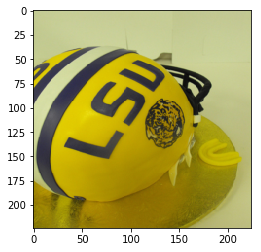

In [106]:
plt.imshow(np.uint8(hf6['train_data'][0]))

In [107]:
hf6.close()